In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA


In [21]:

fl17_am = pd.read_excel("/Users/lindsayshields/Desktop/FL17_SAP-NIR_and_AM.xlsx", 
                        sheet_name="AM")
columns = ["_".join(i.split()) for i in list(fl17_am.columns)]
fl17_am.columns = columns

rep_1_list = list(fl17_am.REP_1)
rep_2_list = list(fl17_am.REP_2)

fl17_am.head(n=778)

,REP_1,REP_2,R1_SAMPLE_ID,R2_SAMPLE_ID,PI,Common_Name,AM_SNP_(S8_3510530),Pericarp,Testa,Tannins_(CE)/g,...,R1_Cp_Qual,R2_Cp_Qual,R1_Se_Qual,R2_Se_Qual,Count,Unnamed:_24,Unnamed:_25,Unnamed:_26,Unnamed:_27,Unnamed:_28
0,FL17-SAP-M1-p0415,FL17-SAP-M2-p0418,p0415-M1,p0418-M2,PI533979,Bulfontein White Kafir Corn DL/60/133,C,W,0.000000,-,...,1.0,1.0,1.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN
1,FL17-SAP-M1-p0419,FL17-SAP-M2-p0416,p0419-M1,p0416-M2,PI576393,MN 708 (preconverted),G,R,1.000000,20.8,...,1.0,1.0,1.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN
2,FL17-SAP-M1-p0513,FL17-SAP-M2-p0513,p0513-M1,p0513-M2,PI656003,B AZ9504,C,R,1.000000,19.9,...,1.0,1.0,1.0,1.0,4.0,NaN,-0.124249,-0.072091,0.697369,0.661612
3,FL17-SAP-M1-p1522,FL17-SAP-M2-p1509,p1522-M1,p1509-M2,PI655995,DEER,C,R,1.000000,63.8,...,1.0,1.0,1.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN
4,FL17-SAP-M1-p1620,FL17-SAP-M2-p1614,p1620-M1,p1614-M2,PI642998,Black Spanish,G,R,1.000000,78.5,...,1.0,1.0,1.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,NaN,NaN,NaN,NaN,PI533807,SAP-206,G,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,NaN,NaN,NaN,NaN,NaN,NaN,C,4.52958,2.916667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
fl17_am.tail()

,REP_1,REP_2,R1_SAMPLE_ID,R2_SAMPLE_ID,PI,Common_Name,AM_SNP_(S8_3510530),Pericarp,Testa,Tannins_(CE)/g,...,R1_Cp_Qual,R2_Cp_Qual,R1_Se_Qual,R2_Se_Qual,Count,Unnamed:_24,Unnamed:_25,Unnamed:_26,Unnamed:_27,Unnamed:_28
383,NaN,NaN,NaN,NaN,PI533807,SAP-206,G,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,NaN,NaN,NaN,NaN,NaN,NaN,C,4.52958,2.916667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,NaN,NaN,NaN,NaN,NaN,NaN,G,2.81441,2.596774,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
fl17_ama.tail()

,PI,Common,Sample_ID,ADF,Aflatoxin,Amylopectin,Amylopectine_to_Total_Dry_Matter_Dry_basis,Amylose,Amylose_to_Total_Dry_Matter_Dry_basis,aNDFom,...,Prolamin,Protein,Selenium,Sodium,Starch,Zinc,Rep,Sample ID,cp_AMA,sal_AMA
789,NaN,NaN,Range,6.36,7.54,27.33,26.55,22.63,17.51,9.33,...,3.43,10.16,0.77,0,21.57,19.07,NaN,Range,NaN,NaN
790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,min,NaN,NaN
791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,max,NaN,NaN
792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mean,NaN,NaN
793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,range,NaN,NaN


In [20]:
fl17_Raw.tail()

,PI,Common,Sample_ID,ADF,Aflatoxin,Amylopectin,Amylopectine_to_Total_Dry_Matter_Dry_basis,Amylose,Amylose_to_Total_Dry_Matter_Dry_basis,aNDFom,...,Nitrogen,Nitrogen_mg,Phosphorus,Prolamin,Protein,Selenium,Sodium,Starch,Zinc,Rep
779,NaN,NaN,NaN,ADF,Aflatoxin,Amylopectine to Starch,Amylopectine to Total Dry Matter,Amylose to Starch,Amylose to Total Dry Matter,aNDFom,...,Nitrogen,Nitrogen mg,Phosphorus,Prolamin,Protein,Selenium,Sodium,Starch,Zinc,NaN
780,NaN,NaN,Min,3.03,-1.19,75,40.78,0.83,-2.07,-3.1,...,0.91,4.53,0.28,3.64,6.27,-0.38,0,54.97,8.8,NaN
781,NaN,NaN,Max,9.39,6.35,102.33,67.33,23.46,15.44,6.23,...,2.6,13.46,0.46,7.07,16.43,0.39,0,76.54,27.87,NaN
782,NaN,NaN,Mean,5.32433,1.80686,86.3263,55.7232,13.4583,10.2718,1.03647,...,1.79889,9.2165,0.358779,5.3054,11.3804,-0.163432,0,68.4862,19.015,NaN
783,NaN,NaN,Range,6.36,7.54,27.33,26.55,22.63,17.51,9.33,...,1.69,8.93,0.18,3.43,10.16,0.77,0,21.57,19.07,NaN


In [17]:
os.getcwd()

'/Users/lindsayshields/Desktop'

In [5]:
cd /Users/lindsayshields/Desktop

/Users/lindsayshields/Desktop


In [6]:
fl17_am.tail()

,REP_1,REP_2,R1_SAMPLE_ID,R2_SAMPLE_ID,PI,Common_Name,AM_SNP_(S8_3510530),Pericarp,Testa,Tannins_(CE)/g,...,R1_Cp_Qual,R2_Cp_Qual,R1_Se_Qual,R2_Se_Qual,Count,Unnamed:_24,Unnamed:_25,Unnamed:_26,Unnamed:_27,Unnamed:_28
383,NaN,NaN,NaN,NaN,PI533807,SAP-206,G,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,NaN,NaN,NaN,NaN,NaN,NaN,C,4.52958,2.916667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,NaN,NaN,NaN,NaN,NaN,NaN,G,2.81441,2.596774,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
fl17_Raw = pd.read_excel("/Users/lindsayshields/Desktop/FL17_SAP-NIR_and_AM.xlsx", sheet_name="Raw")
columns = ["_".join(i.split()) for i in list(fl17_Raw.columns)]
fl17_Raw.columns = columns
rep = []
for i in fl17_Raw.Sample_ID:
    if (pd.isnull(i)):
        rep.append(np.nan)
    elif (i in rep_1_list):
        rep.append(1)
    elif (i in rep_2_list):
        rep.append(2)
    else:
        rep.append(np.nan)
fl17_Raw["Rep"] = rep
fl17_Raw.head()

,PI,Common,Sample_ID,ADF,Aflatoxin,Amylopectin,Amylopectine_to_Total_Dry_Matter_Dry_basis,Amylose,Amylose_to_Total_Dry_Matter_Dry_basis,aNDFom,...,Nitrogen,Nitrogen_mg,Phosphorus,Prolamin,Protein,Selenium,Sodium,Starch,Zinc,Rep
0,PI533876,KA 12 Janjari,FL17-SAP-M1-p0101,4.92,0.21,88.89,54.44,13.63,10.96,1.42,...,1.47,7.73,0.34,4.51,9.5,-0.17,0,69.89,19.95,1.0
1,PI576350,SAP-417,FL17-SAP-M1-p0102,7.24,2.28,83.41,51.83,15.86,9.72,-0.8,...,2.1,10.7,0.39,6.14,12.84,-0.13,0,61.98,23.58,1.0
2,PI595741,SAP-134,FL17-SAP-M1-p0105,3.28,3.5,89.68,61.26,10.8,7.92,-1.98,...,1.65,8.66,0.33,5.12,10.42,-0.13,0,72.12,15.92,1.0
3,PI534096,SO 85,FL17-SAP-M1-p0106,5.55,2.37,85.91,52.52,13.7,10.4,1.19,...,2.14,11.04,0.39,6.08,13.63,-0.19,0,66.76,22,1.0
4,PI534047,450 Bori Light Brown,FL17-SAP-M1-p0107,5.64,1.51,86.53,56.83,12.54,10.57,1.02,...,1.97,9.96,0.37,5.97,12.31,-0.23,0,67.67,20.49,1.0


In [8]:
numeric_columns = fl17_Raw.columns[3:len(fl17_Raw.columns)-1]
x = fl17_Raw[numeric_columns.values]

In [9]:
x

,ADF,Aflatoxin,Amylopectin,Amylopectine_to_Total_Dry_Matter_Dry_basis,Amylose,Amylose_to_Total_Dry_Matter_Dry_basis,aNDFom,Arsenic,Ash,BTU,...,NDF,Nitrogen,Nitrogen_mg,Phosphorus,Prolamin,Protein,Selenium,Sodium,Starch,Zinc
0,4.92,0.21,88.89,54.44,13.63,10.96,1.42,-0.12,1.55,7331.25,...,6.83,1.47,7.73,0.34,4.51,9.5,-0.17,0,69.89,19.95
1,7.24,2.28,83.41,51.83,15.86,9.72,-0.8,0.08,1.76,7518.57,...,14.95,2.1,10.7,0.39,6.14,12.84,-0.13,0,61.98,23.58
2,3.28,3.5,89.68,61.26,10.8,7.92,-1.98,-0.34,1.58,7399.33,...,5.99,1.65,8.66,0.33,5.12,10.42,-0.13,0,72.12,15.92
3,5.55,2.37,85.91,52.52,13.7,10.4,1.19,-0.57,1.72,7508.3,...,8.84,2.14,11.04,0.39,6.08,13.63,-0.19,0,66.76,22
4,5.64,1.51,86.53,56.83,12.54,10.57,1.02,-0.17,1.7,7465.06,...,9.1,1.97,9.96,0.37,5.97,12.31,-0.23,0,67.67,20.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,ADF,Aflatoxin,Amylopectine to Starch,Amylopectine to Total Dry Matter,Amylose to Starch,Amylose to Total Dry Matter,aNDFom,Arsenic,Ash,BTU,...,NDF,Nitrogen,Nitrogen mg,Phosphorus,Prolamin,Protein,Selenium,Sodium,Starch,Zinc
780,3.03,-1.19,75,40.78,0.83,-2.07,-3.1,-1.08,1.38,7146.63,...,4.5,0.91,4.53,0.28,3.64,6.27,-0.38,0,54.97,8.8
781,9.39,6.35,102.33,67.33,23.46,15.44,6.23,1.62,1.93,8006.36,...,23.68,2.6,13.46,0.46,7.07,16.43,0.39,0,76.54,27.87
782,5.32433,1.80686,86.3263,55.7232,13.4583,10.2718,1.03647,-0.31063,1.64167,7434.27,...,9.22906,1.79889,9.2165,0.358779,5.3054,11.3804,-0.163432,0,68.4862,19.015


In [10]:
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['PC1', 'PC2'])
# finalDf = pd.concat([principalDf, fl17_Raw[['PI']]], axis = 1)

# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.scatter(finalDf.loc[:, 'PC1']
#                , finalDf.loc[:, 'PC2'])
# # for pi in 
# ax.set_xlabel('PC 1', fontsize = 15)
# ax.set_ylabel('PC 2', fontsize = 15)
# ax.set_title('Phenotype PCA', fontsize = 20)
# plt.show()

In [11]:
# test.pivot_table?

In [12]:
ama = list(set(["PI533750","PI533750","PI533752","PI533752","PI533754",
                "PI533754","PI533757","PI533757","PI533760","PI533760",
                "PI533761","PI533762","PI533762","PI533785","PI533785",
                "PI533788","PI533788","PI533789","PI533789","PI533799",
                "PI533799","PI533821","PI533822","PI533822","PI533824",
                "PI533824","PI533830","PI533830","PI533831","PI533831",
                "PI533833","PI533833","PI533869","PI533869","PI533871",
                "PI533871","PI533876","PI533876","PI533902","PI533902",
                "PI533903","PI533903","PI533910","PI533910","PI533919",     
                "PI533919","PI533924","PI533927","PI533927","PI533938",
                "PI533939","PI533939","PI533940","PI533940","PI533948",
                "PI533948","PI533955","PI533955","PI533956","PI533956",
                "PI533957","PI533957","PI533961","PI533961","PI533962",
                "PI533962","PI533965","PI533965","PI533972","PI533972",
                "PI533976","PI533979","PI533979","PI533980","PI533980",
                "PI533985","PI533985","PI533986","PI533986","PI533987",
                "PI534009","PI534009","PI534037","PI534037","PI534046",
                "PI534046","PI534047","PI534047","PI534053","PI534053",
                "PI534075","PI534075","PI534092","PI534092","PI534101",
                "PI534105","PI534105","PI534108","PI534108","PI534112",
                "PI534112","PI534114","PI534115","PI534115","PI534116",
                "PI534117","PI534117","PI534123","PI534123","PI534124",
                "PI534124","PI534127","PI534128","PI534128","PI534133",
                "PI534135","PI534138","PI534144","PI534144","PI534148",
                "PI534155","PI534155","PI542718","PI576332","PI576332",
                "PI576348","PI576350","PI576364","PI576373","PI576373",
                "PI576375","PI576375","PI576376","PI576376","PI576391",
                "PI576391","PI576393","PI576393","PI576396","PI576396",
                "PI576399","PI576399","PI576425","PI576425","PI576426",
                "PI576426","PI595702","PI595702","PI595739","PI595740",
                "PI595740","PI595743","PI595743","PI597945","PI597946",
                "PI597946","PI597951","PI597951","PI597952","PI597952",
                "PI597957","PI597957","PI597958","PI597958","PI597964",
                "PI597964","PI597966","PI597966","PI597968","PI597968",
                "PI597972","PI597972","PI597973","PI597973","PI597976",
                "PI597976","PI597982","PI597982","PI656046","PI656046",
                "PI656082","PI656082","PI656083","PI656083","PI656086",
                "PI656086","PI656089","PI656089","PI656091","PI656094",
                "PI656094","PI656102","PI656102","PI656103","PI656103",
                "PI656104","PI656104","PI656105","PI656105","PI656106",
                "PI656106","PI656107","PI656107","PI656110","PI656110",
                "PI656111","PI656111","PI656112","PI656112","PI656121",
                "PI656121","PI659696","PI659696"]))

In [13]:
test = fl17_Raw[fl17_Raw.PI.isin(ama)]
for i in numeric_columns.values:
    print(test[["PI",i]].pivot_table(index="PI", aggfunc="mean").reset_index().describe())
    sns.boxplot(x="PI", y=i, data=test)
    plt.show()

DataError: No numeric types to aggregate

In [4]:
nir_ama_lines = pd.read_excel("../data/Supplemental_F2.xlsx","Clostridium")
nir_ama_lines = nir_ama_lines[["Sample ID","cp_AMA"]]
nir_ama_lines.head()

,Sample ID,cp_AMA
0,p0101-M1,0.0
1,p0101-M2,0.0
2,p0102-M1,0.0
3,p0102-M2,0.0
4,p0103-M2,0.0


In [49]:
fl17_ama = fl17_Raw.merge(nir_ama_lines, left_on="Sample_ID",right_on="Sample ID", how="outer")
fl17_ama["cp_AMA"] = fl17_ama["cp_AMA"].fillna(0)
fl17_ama = fl17_ama.head(n=776)
#fl17_ama.to_excel("fl17_ama.xlsx")


### fl17_ama dataset creation
Fl17_SAP_NIR_and_AMA excel file was merged with new excel file to create fl17_ama.xlsx
new.xlsx was a subset of all samples that demonstrated antimicrobial activity for either c. perfringens or S. enterica.

samples missing antimicrobial activity in the fl17_ama.xlsx file are samples that did not show antimicrobial activity for EITHER pathogen.

In [27]:
from scipy.stats import pearsonr

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


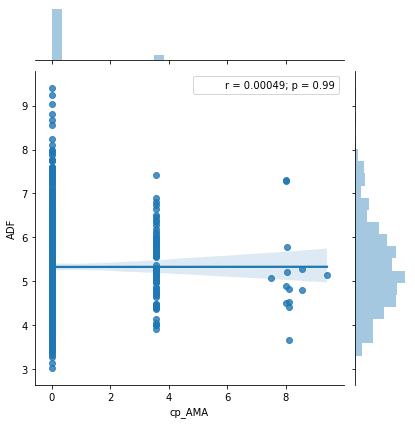

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


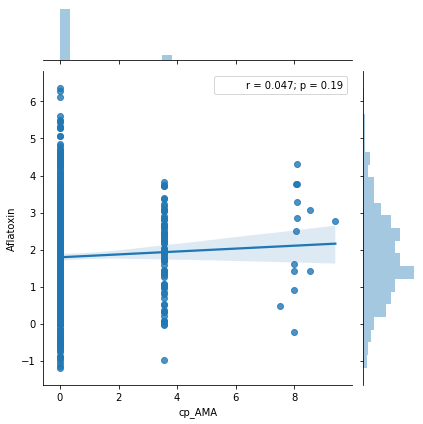

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


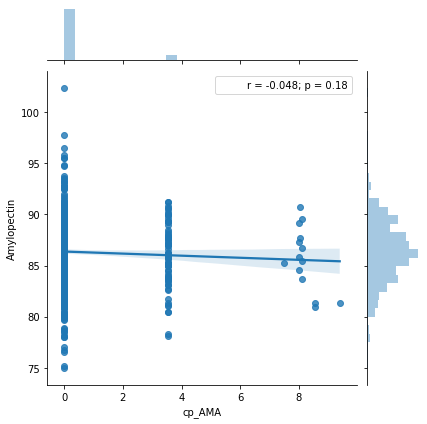

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


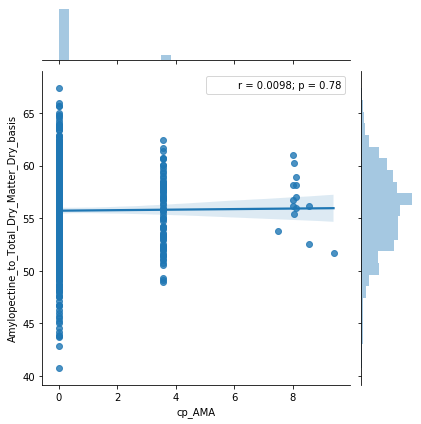

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


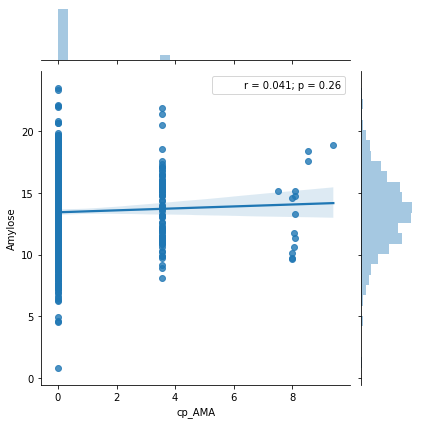

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


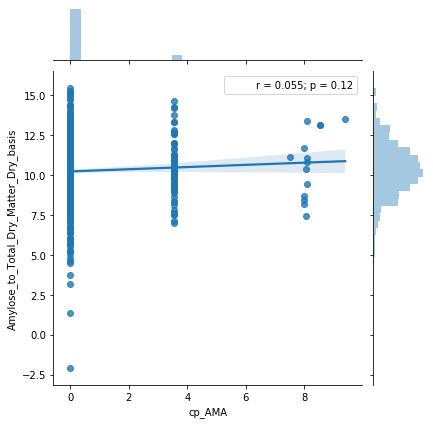

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


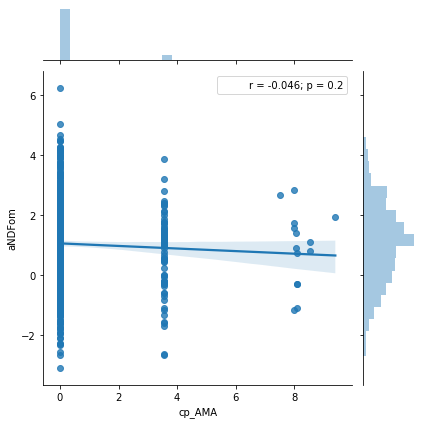

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


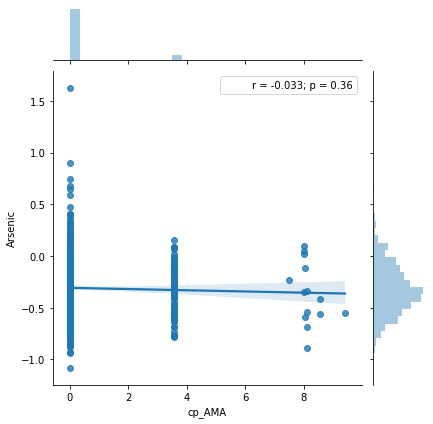

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


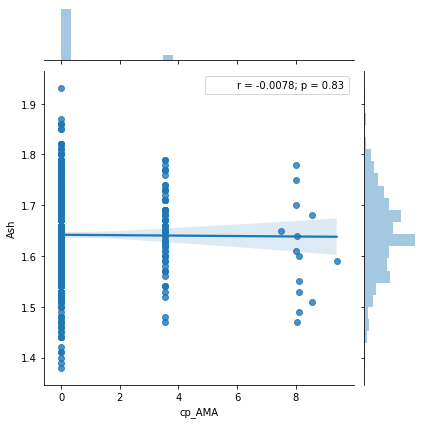

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


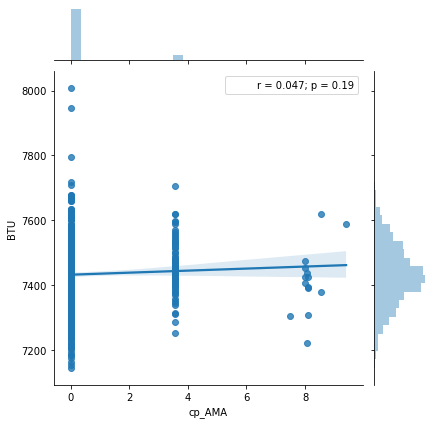

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


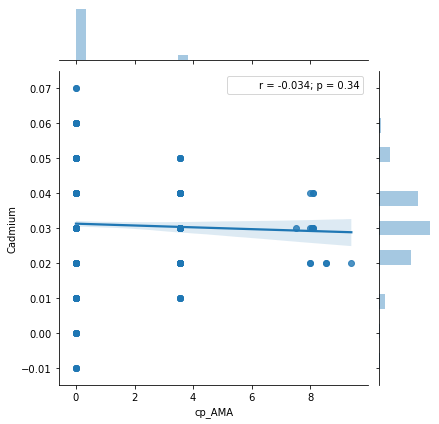

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


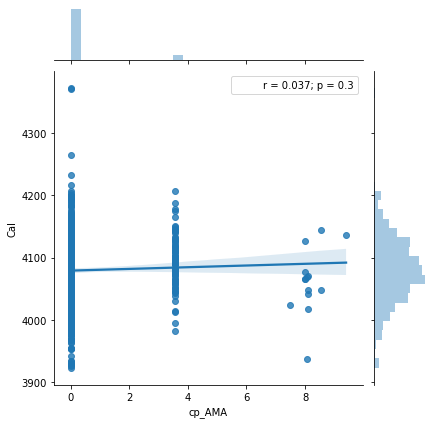

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


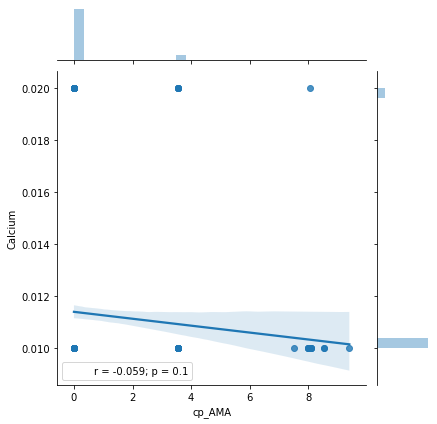

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


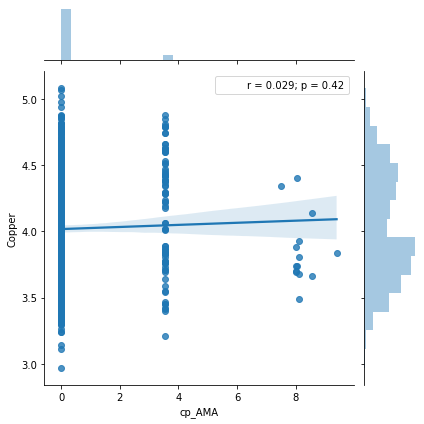

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


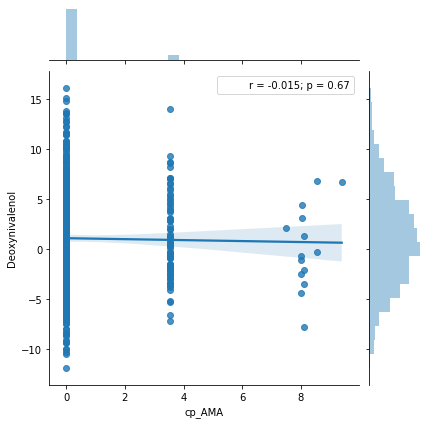

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


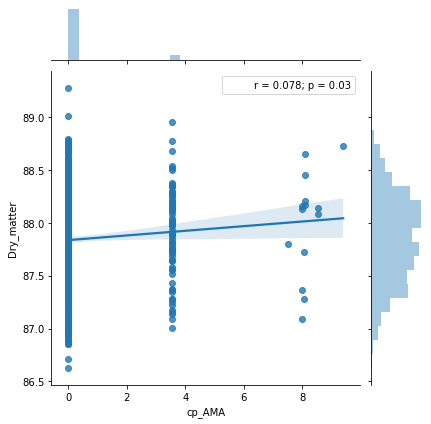

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


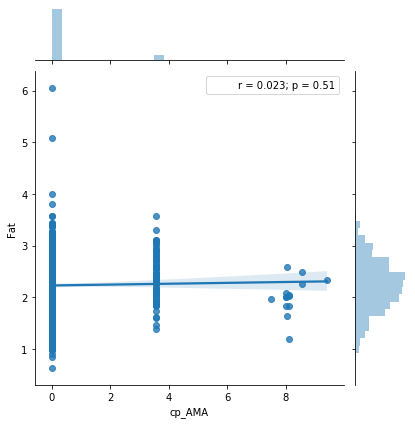

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


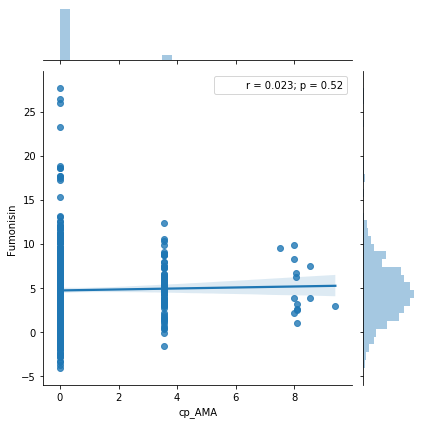

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


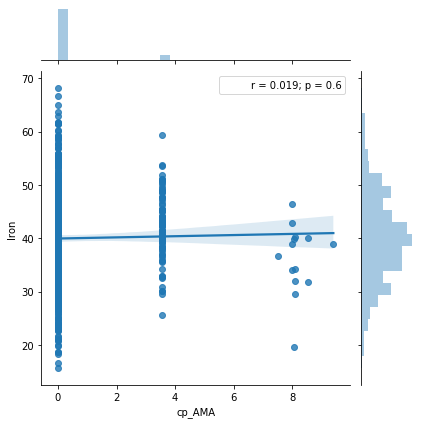

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


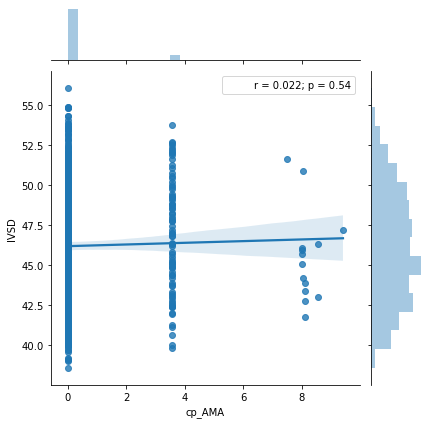

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


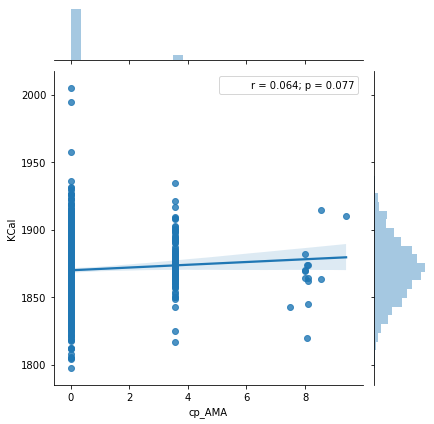

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


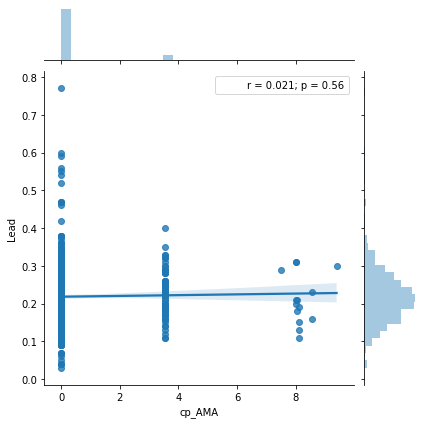

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


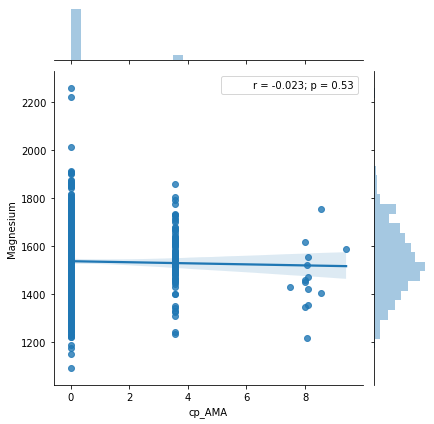

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


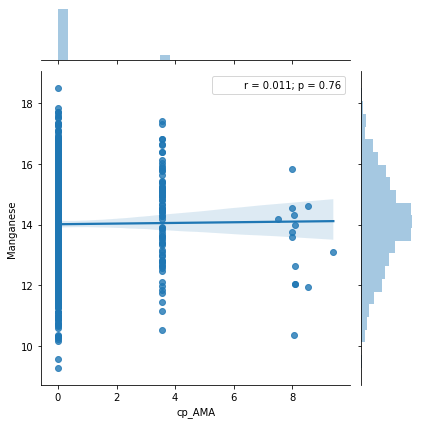

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


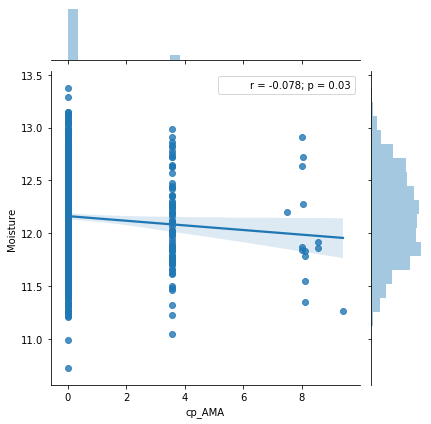

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


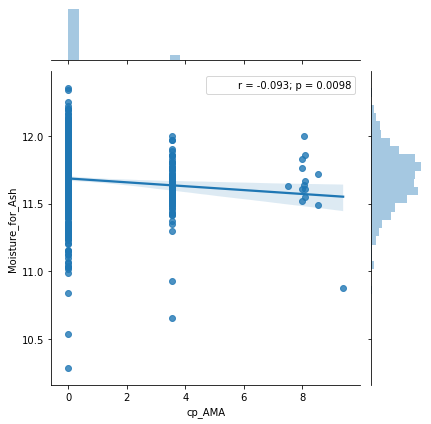

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


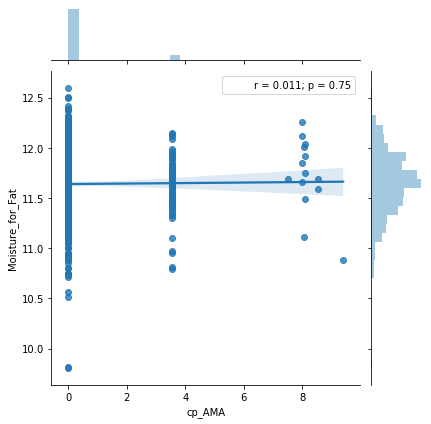

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


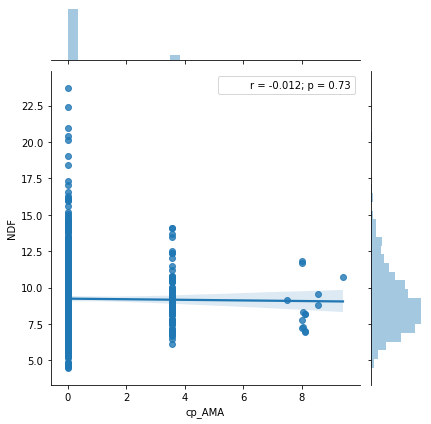

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


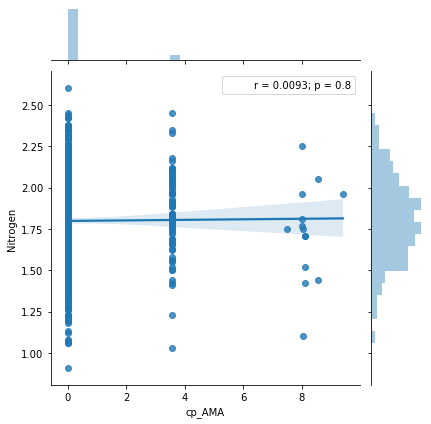

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


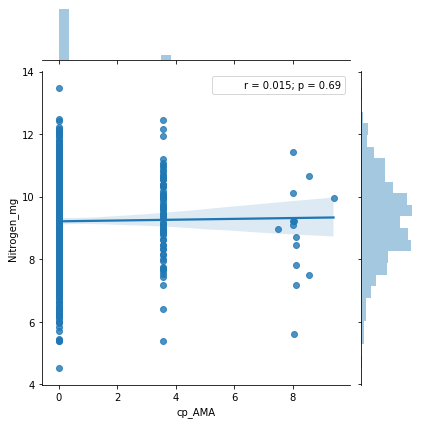

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


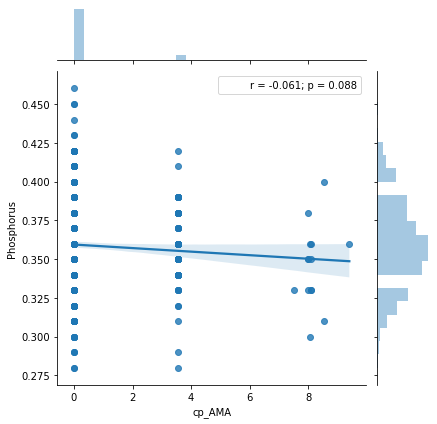

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


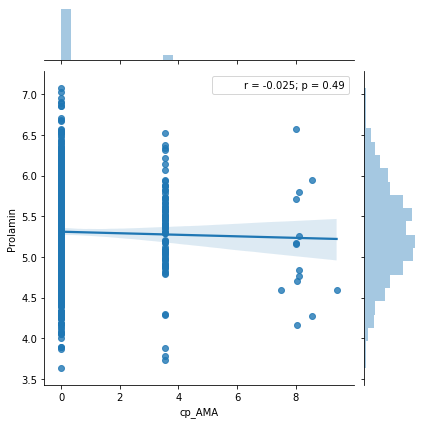

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


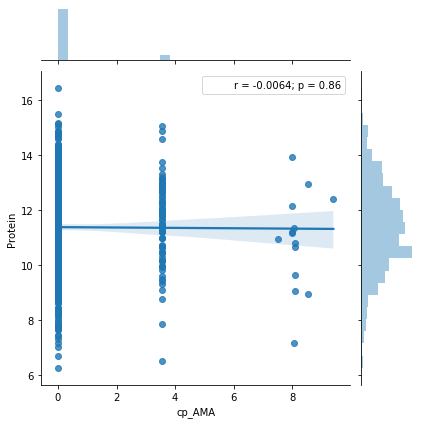

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


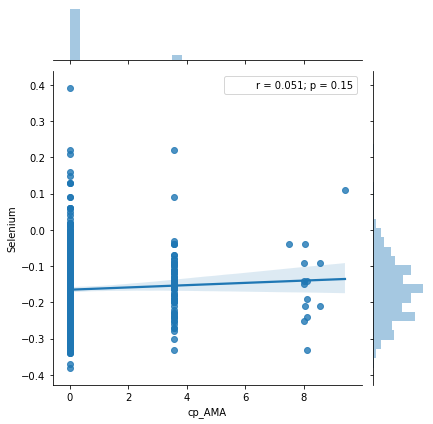

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


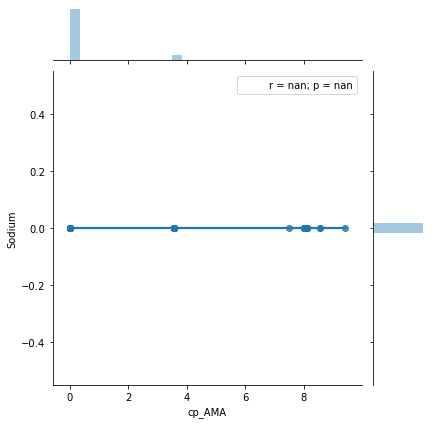

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


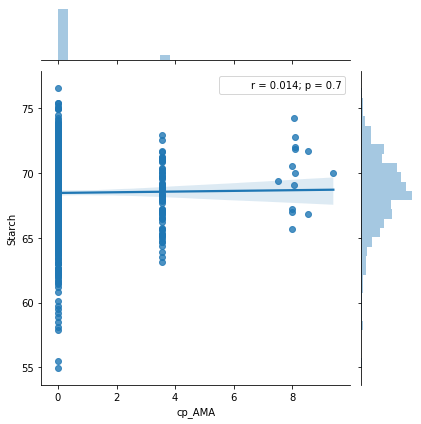

/Users/lindsayshields/opt/anaconda3/envs/py3k/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


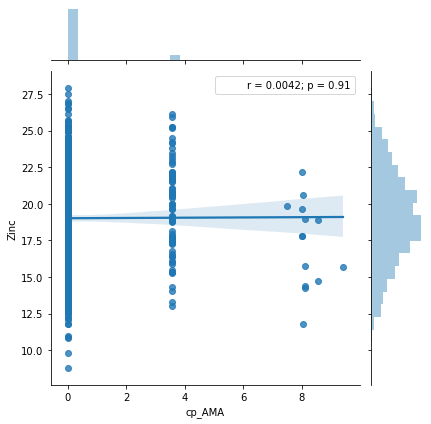

In [52]:
def r(x, y):
    return stats.pearsonr(x, y)

p_values = []

for i in numeric_columns.values:
    sns.jointplot(x="cp_AMA", 
                  y=i, 
                  data=fl17_ama, 
                  kind="reg", 
                  marginal_kws=dict(kde=False), 
                  stat_func=r)
    # sns.regplot(x="cp_AMA", y=i, data=fl17_ama, fit_reg=True)
    p_values.append(r(fl17_ama.cp_AMA, fl17_ama.loc[:,i]))
    plt.show()

In [62]:
corr_pval = pd.DataFrame(p_values, columns=["r","pvalue"])
corr_pval = corr_pval.drop(34)
corr_pval.tail()

,r,pvalue
31,-0.024743,0.491298
32,-0.006443,0.857792
33,0.051308,0.153314
35,0.013985,0.697310
36,0.004231,0.906324


In [65]:
corr_pval.to_excel("corr_pval.xlsx")

In [64]:
sms.stats.multipletests?

In [63]:
import statsmodels.api as sms

sms.stats.multipletests(corr_pval["pvalue"], alpha=0.05, method="fdr_bh")

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False]),
 array([0.98911538, 0.59033505, 0.59033505, 0.89490213, 0.71648918,
        0.59033505, 0.59033505, 0.80149612, 0.90447545, 0.59033505,
        0.80149612, 0.77333691, 0.59033505, 0.8766808 , 0.89490213,
        0.36088576, 0.8766808 , 0.8766808 , 0.89490213, 0.8766808 ,
        0.59033505, 0.8766808 , 0.8766808 , 0.89490213, 0.36088576,
        0.35364925, 0.89490213, 0.89490213, 0.89490213, 0.89490213,
        0.59033505, 0.8766808 , 0.9082505 , 0.59033505, 0.89490213,
        0.93221909]),
 0.0014237991678133222,
 0.001388888888888889)

In [66]:
#